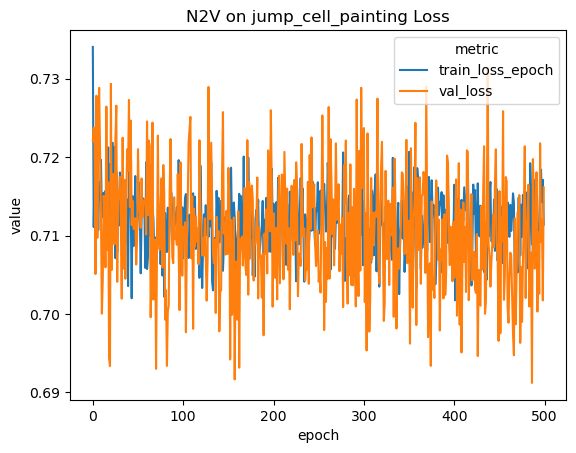

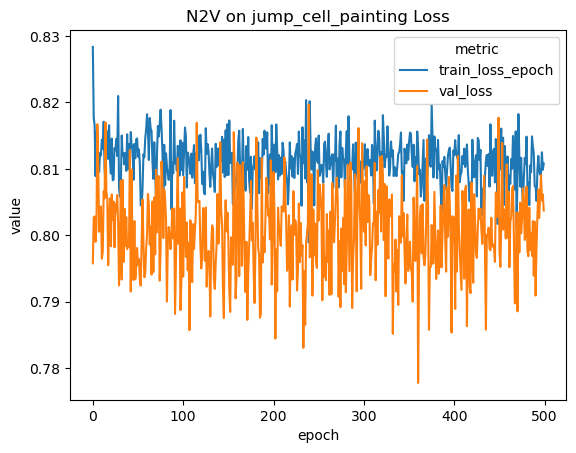

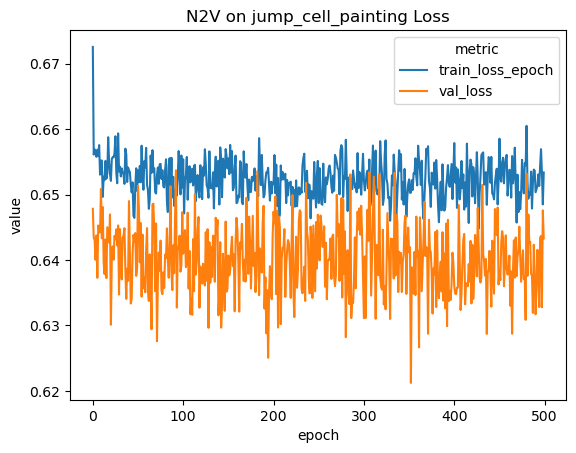

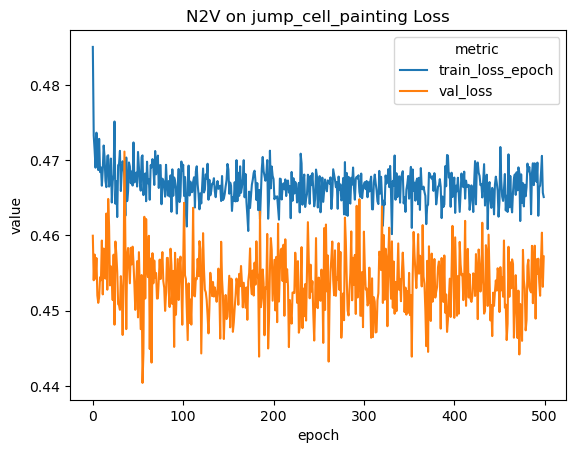

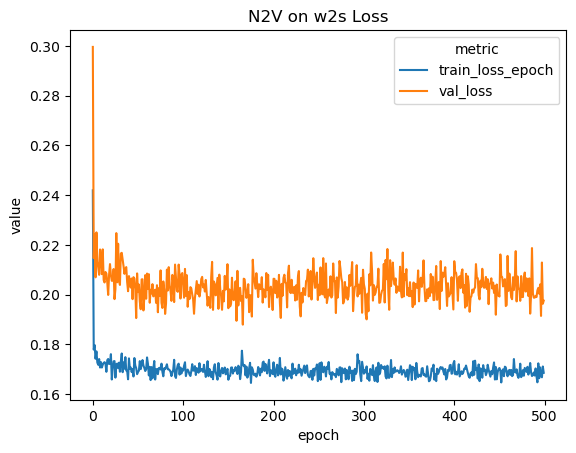

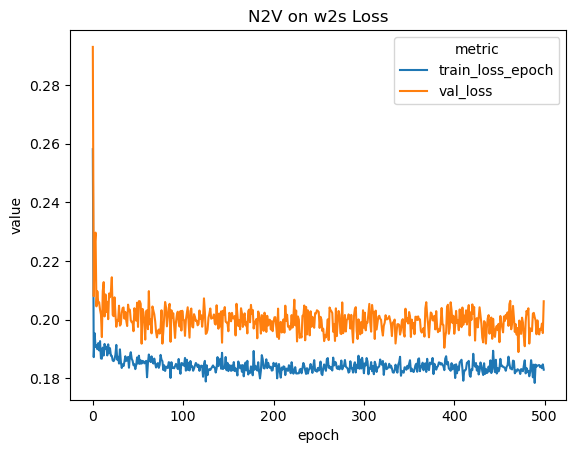

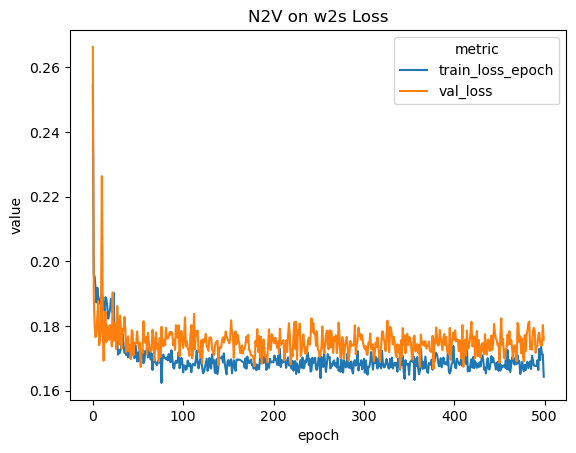

File /localscratch/AI4LifeSumbissions/models/run2/w2s/ch_3/n2v/lightning_logs/version_0/metrics.csv does not exist


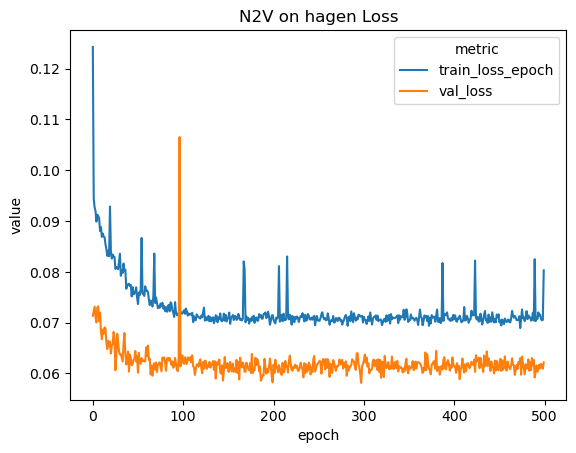

File /localscratch/AI4LifeSumbissions/models/run2/hagen/ch_1/n2v/lightning_logs/version_0/metrics.csv does not exist
File /localscratch/AI4LifeSumbissions/models/run2/hagen/ch_2/n2v/lightning_logs/version_0/metrics.csv does not exist
File /localscratch/AI4LifeSumbissions/models/run2/hagen/ch_3/n2v/lightning_logs/version_0/metrics.csv does not exist


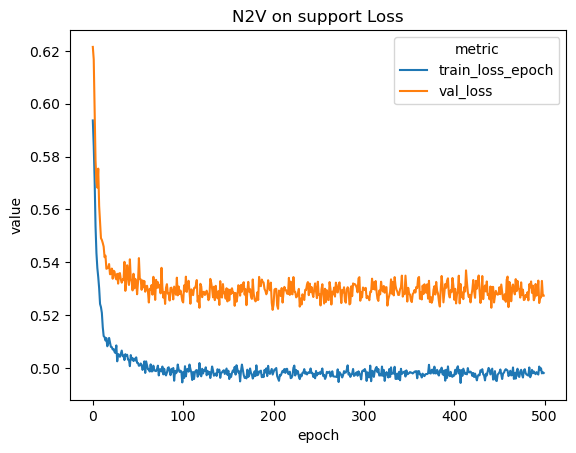

File /localscratch/AI4LifeSumbissions/models/run2/support/ch_1/n2v/lightning_logs/version_0/metrics.csv does not exist
File /localscratch/AI4LifeSumbissions/models/run2/support/ch_2/n2v/lightning_logs/version_0/metrics.csv does not exist
File /localscratch/AI4LifeSumbissions/models/run2/support/ch_3/n2v/lightning_logs/version_0/metrics.csv does not exist


In [1]:
import pandas as pd
import seaborn as sb
from datasets import load_datasets_yml
from matplotlib import pyplot as plt
import os

datasets_desc=load_datasets_yml()
datasets_names = [d["name"] for d in datasets_desc]
RUN = "run2"

for dname in datasets_names:
    for channel in range(4):
        PATH = f"/localscratch/AI4LifeSumbissions/models/{RUN}/{dname}/ch_{channel}/n2v/lightning_logs/version_0/metrics.csv"
        if not os.path.exists(PATH):
            print(f"File {PATH} does not exist")
            continue
        metrics = pd.read_csv(PATH)
        metrics = metrics.melt(id_vars=["epoch", "step"], var_name="metric", value_name="value")
        metrics = metrics[metrics["metric"].isin(["train_loss_epoch", "val_loss"])]
        fig = sb.lineplot(data=metrics, x="epoch", y="value", hue="metric")
        fig.set_title(f"N2V on {dname} Loss")
        plt.show()
        # Salve plot next to the csv file
        fig.figure.savefig(f"{PATH.replace('metrics.csv', 'loss.png')}")